# Machine learning workflow demo

## Predicting house prices with California data

## Load libs

In [1]:
import warnings
warnings.simplefilter("ignore")
%run -i utils/calhousing.py
%matplotlib inline

Loading BokehJS ...

## Inspect data in source format

In [2]:
!head data/cal_housing_small.data
!wc data/cal_housing_small.data

longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,medianHouseValue
-120.58,35.0,37.0,523.0,119.0,106300.0
-118.17,33.98,31.0,1236.0,329.0,155400.0
-122.22,37.81,52.0,1971.0,335.0,273700.0
-117.91,33.66,21.0,1708.0,505.0,193800.0
-121.92,37.24,27.0,1265.0,216.0,281200.0
-117.01,32.71,20.0,3506.0,692.0,129100.0
-116.39,34.15,15.0,5583.0,1149.0,73300.0
-120.67,35.5,15.0,2752.0,546.0,175000.0
-118.18,34.04,36.0,1807.0,630.0,129000.0
  501   501 20363 data/cal_housing_small.data


## Load data in Python's memory

In [3]:
d = pd.read_csv("data/cal_housing_small.data")
print (d.shape)
d.head()

(500, 6)


longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -120.58     35.00              37.0       523.0          119.0   
1    -118.17     33.98              31.0      1236.0          329.0   
2    -122.22     37.81              52.0      1971.0          335.0   
3    -117.91     33.66              21.0      1708.0          505.0   
4    -121.92     37.24              27.0      1265.0          216.0   

   medianHouseValue  
0          106300.0  
1          155400.0  
2          273700.0  
3          193800.0  
4          281200.0

## Show house locations on map

observa como el valor de las casas es más caro en zonas urbanas

In [4]:
%run -i utils/calhousing.py
ds = d.sample(500)
plot_map(ds["latitude"].values, 
         ds["longitude"].values, ds["medianHouseValue"].values.reshape(-1,1)/1e5) 

Loading BokehJS ...

## Separate variable to predict

In [5]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print (X.shape, y.shape)

(500, 5) (500,)


Split data from train and test

In [6]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
print (Xtr.shape, ytr.shape)
print (Xts.shape, yts.shape)

(350, 5) (350,)
(150, 5) (150,)


Create model with train data

In [7]:
from sklearn.svm import SVC
dt = DecisionTreeRegressor()
dt = SVC()
dt.fit(Xtr,ytr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Measure performance

In [8]:
print ("train score", rel_rmse(dt, Xtr, ytr))
print ("test score ", rel_rmse(dt, Xts, yts))

train score 0.0
test score  2.6071191279599124


## Plot geographical distribution of errors

- limit errors to <1

In [9]:
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1] = 1
plot_map(Xts[:,1], Xts[:,0], errs.reshape(-1,1))

## Make a parameter search

In [10]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
best

mean_fit_time               0.00135777
std_fit_time               2.79962e-05
mean_score_time            0.000163102
std_score_time             1.15585e-05
param_max_depth                      7
params                {'max_depth': 7}
split0_test_score             0.405402
split1_test_score             0.445513
split2_test_score             0.391471
split3_test_score             0.395643
split4_test_score             0.536327
split5_test_score             0.454575
split6_test_score             0.373376
split7_test_score             0.460534
split8_test_score             0.377806
split9_test_score             0.427263
mean_test_score               0.426791
std_test_score               0.0471034
rank_test_score                     19
split0_train_score            0.192292
split1_train_score            0.287821
split2_train_score            0.206624
split3_train_score            0.220411
split4_train_score            0.300404
split5_train_score            0.239708
split6_train_score       

In [11]:
r

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.000603      0.000120         0.000243        0.000124   
1        0.000709      0.000100         0.000236        0.000105   
2        0.000907      0.000145         0.000201        0.000063   
3        0.001090      0.000135         0.000219        0.000059   
4        0.001216      0.000120         0.000229        0.000107   
5        0.001291      0.000053         0.000164        0.000008   
6        0.001358      0.000028         0.000163        0.000012   
7        0.001488      0.000014         0.000167        0.000016   
8        0.001703      0.000224         0.000180        0.000035   
9        0.001887      0.000275         0.000213        0.000061   
10       0.001767      0.000080         0.000166        0.000007   
11       0.001799      0.000061         0.000171        0.000021   
12       0.002307      0.000466         0.000230        0.000074   
13       0.001941      0.000072         0.000186        0.000017   
14       0.002069      0.000207         0.000231        0.000067   
15       0.002006      0.000148         0.000202        0.000072   
16       0.001918      0.000062         0.000165        0.000003   
17       0.001861      0.000068         0.000160        0.000005   
18       0.001858      0.000051         0.000163        0.000009   

   param_max_depth             params  split0_test_score  split1_test_score  \
0                1   {'max_depth': 1}           0.682824           0.497395   
1                2   {'max_depth': 2}           0.624185           0.469594   
2                3   {'max_depth': 3}           0.506541           0.455372   
3                4   {'max_depth': 4}           0.440022           0.458800   
4                5   {'max_depth': 5}           0.411942           0.448655   
5                6   {'max_depth': 6}           0.411118           0.462350   
6                7   {'max_depth': 7}           0.405402           0.445513   
7                8   {'max_depth': 8}           0.415656           0.457492   
8                9   {'max_depth': 9}           0.456461           0.484257   
9               10  {'max_depth': 10}           0.492728           0.485201   
10              11  {'max_depth': 11}           0.484780           0.472082   
11              12  {'max_depth': 12}           0.477393           0.490124   
12              13  {'max_depth': 13}           0.472538           0.482272   
13              14  {'max_depth': 14}           0.428552           0.476343   
14              15  {'max_depth': 15}           0.470226           0.457892   
15              16  {'max_depth': 16}           0.479682           0.456352   
16              17  {'max_depth': 17}           0.434574           0.488114   
17              18  {'max_depth': 18}           0.468600           0.470803   
18              19  {'max_depth': 19}           0.419168           0.477698   

    split2_test_score  split3_test_score  ...  split2_train_score  \
0            0.566530           0.628341  ...            0.605847   
1            0.515386           0.578889  ...            0.547818   
2            0.460848           0.582567  ...            0.433806   
3            0.432783           0.554249  ...            0.377115   
4            0.418983           0.434899  ...            0.312966   
5            0.393897           0.395285  ...            0.243408   
6            0.391471           0.395643  ...            0.206624   
7            0.437673           0.398396  ...            0.155053   
8            0.374458           0.413324  ...            0.105417   
9            0.341586           0.425386  ...            0.068060   
10           0.423490           0.423067  ...            0.045951   
11           0.371737           0.457360  ...            0.028748   
12           0.362829           0.466634  ...            0.015008   
13           0.386192           0.502490  ...            0.006988   
14           0.372118      

## Use learning curves to assess performance


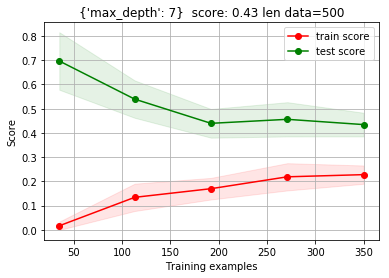

In [12]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## We obtained models with LOTS of variance!!! $\rightarrow$ increase data to 1k

In [13]:
d = pd.read_csv("data/cal_housing.data").sample(1000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
print(X.shape, y.shape)
d.head()

(1000, 5) (1000,)


longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
18880    -122.26     38.10              30.0      3317.0         1058.0   
10384    -117.66     33.62              16.0      5175.0          799.0   
678      -122.15     37.69              36.0      1545.0          273.0   
695      -122.11     37.70              19.0      2693.0          789.0   
8708     -118.36     33.86              37.0      1249.0          218.0   

       medianHouseValue  
18880          133300.0  
10384          257800.0  
678            192900.0  
695            137500.0  
8708           330700.0

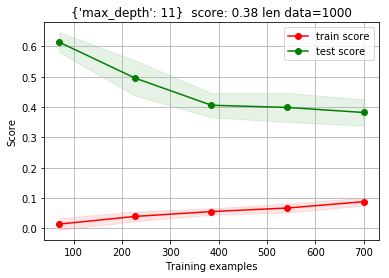

In [14]:
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 10k 

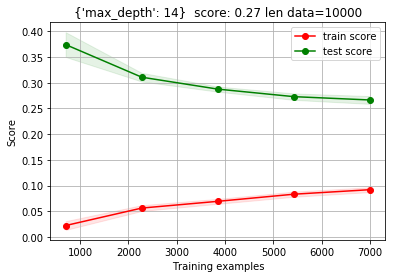

In [15]:

d = pd.read_csv("data/cal_housing.data").sample(10000)
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## increase data until 20k (all available) 

- smaller increase
- very little variability
- still large variance!!!

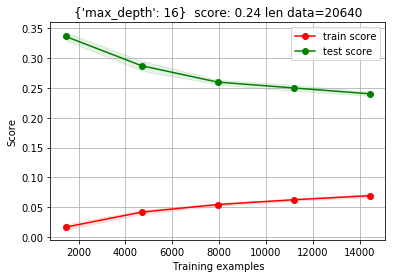

In [16]:
d = pd.read_csv("data/cal_housing.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## no more data available. let's try to add more information

- not much increase!!!


In [17]:
d = pd.read_csv("data/cal_housing_full.data")
d.head()

longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0

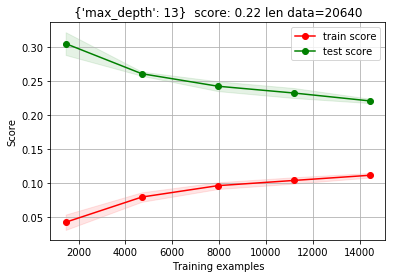

In [18]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

## Let's observe geographical error distribution

In [19]:
d = pd.read_csv("data/cal_housing_full.data")
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(Xtr,ytr)
print("train score", rel_rmse(dt, Xtr, ytr))
print("test score ", rel_rmse(dt, Xts, yts))
preds = dt.predict(Xts)
errs = np.abs(preds-yts)/yts
errs[errs>1]=1
plot_map(Xts[:3000,1], Xts[:3000,0], errs.reshape(-1,1))

train score 0.17511022048891503
test score  0.22159225132914004


## We now use this model to predict the price of a new house

In [20]:
newh = [[-118.22, 37.4, 10, 5000, 550, 8000, 200000, 3.5]]
dt.predict(newh)

array([138641.02564103])

## Understand our model's response to each variable

In [21]:
d = pd.read_csv("data/cal_housing_full.data").sample(20000)

nsamples = 1000
ncols = len(d.columns)-1
sample = np.random.random(size=(nsamples, ncols))
sample = (sample*20.).astype(int)/20.
dsample = pd.DataFrame(sample, columns=d.columns[:-1])
for i in d.columns[:-1]:
    dsample[i] = MinMaxScaler(feature_range=(np.min(d[i]), np.max(d[i]))).fit_transform(dsample[i].values.reshape(-1,1))

plot_map(dsample["latitude"], dsample["longitude"], dt.predict(sample).reshape(-1,1)/1e5, size=5)

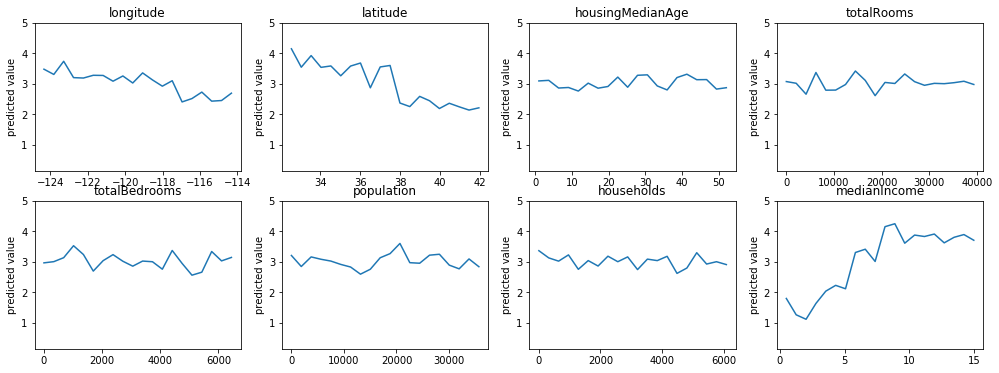

In [22]:
fig = plt.figure(figsize=(17,6))
c = 1
for col in dsample.columns:
    fig.add_subplot(2,4,c)
    c+=1
    x,y = [], []
    for i in np.unique(dsample[col]):
        x.append(i)

        dx = dsample[dsample[col]==i]
        y.append(np.mean(dt.predict(dx)/1e5))
    plt.plot(x,y)
    plt.ylabel("predicted value")
    plt.ylim(np.min(d["medianHouseValue"])/1e5, np.max(d["medianHouseValue"])/1e5)
    plt.title(col)
    

## Try using only visually meaningful columns

- another increase
- still variance

In [23]:
dfull = pd.read_csv("data/cal_housing_full.data")
d = dfull[["longitude", "latitude", "medianIncome", "medianHouseValue"]]
d.shape


(20640, 4)

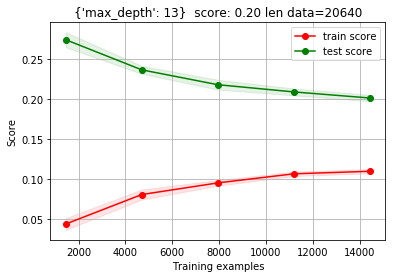

In [24]:
X = d.as_matrix()[:,:-1]
y = d["medianHouseValue"].as_matrix()
parameters = { 'max_depth': list(range(1,20))}
estimator = DecisionTreeRegressor()
best, r = gridsearch_best(X,y, estimator, parameters, n_iter=10, test_size=0.3)
plot_learning_curve(estimator.set_params(**best.params), str(best.params), X, y, n_iter=10, test_size=0.3)

In [25]:
for i,col in enumerate(dfull.columns):
    if col!="medianHouseValue":
        print ("%20s %.3f"%(col, dt.feature_importances_[i]))

           longitude 0.168
            latitude 0.151
    housingMedianAge 0.059
          totalRooms 0.009
       totalBedrooms 0.011
          population 0.012
          households 0.010
        medianIncome 0.581
